In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

Esta tabla contiene las variables construidas, a partir de las 11 tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.

`CB`

In [2]:
file = "../../../../../dataframes/enoe/SDEMT/df_concat.csv"


In [3]:
df = pd.read_csv(file)

/Users/jacoboleon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(76397, 88)

In [5]:
df_copy = df.copy()

In [6]:
df_copy.head()

,CVE_LOC,CVE_MUN,est,t_loc,CVE_ENT,sex,eda,nac_dia,nac_mes,nac_anio,...,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins
0,1,2,10,1,9,1.0,46.0,31.0,3.0,1969.0,...,0,2,4,1,1,1,0,1,7,8
1,1,2,10,1,9,2.0,48.0,28.0,8.0,1967.0,...,0,2,19,1,1,2,0,2,1,9
2,1,2,10,1,9,1.0,23.0,17.0,10.0,1992.0,...,0,2,7,1,2,2,0,3,2,2
3,1,2,10,1,9,2.0,18.0,12.0,4.0,1997.0,...,0,2,0,1,0,0,0,0,0,0
4,1,2,10,1,9,1.0,36.0,31.0,12.0,1979.0,...,0,2,0,1,0,0,0,0,0,0


In [7]:
df_copy.columns

Index(['CVE_LOC', 'CVE_MUN', 'est', 't_loc', 'CVE_ENT', 'sex', 'eda',
       'nac_dia', 'nac_mes', 'nac_anio', 'l_nac_c', 'cs_p12', 'cs_p13_1',
       'cs_p13_2', 'cs_p14_c', 'cs_p15', 'cs_p16', 'cs_p17', 'n_hij', 'e_con',
       'cs_ad_mot', 'cs_p20_des', 'cs_ad_des', 'cs_nr_mot', 'cs_p22_des',
       'cs_nr_ori', 'ur', 'zona', 'salario', 'fac', 'clase1', 'clase2',
       'clase3', 'pos_ocu', 'seg_soc', 'rama', 'c_ocu11c', 'ing7c', 'dur9c',
       'emple7c', 'medica5c', 'buscar5c', 'rama_est1', 'rama_est2', 'dur_est',
       'ambito1', 'ambito2', 'tue1', 'tue2', 'tue3', 'busqueda', 'd_ant_lab',
       'd_cexp_est', 'dur_des', 'sub_o', 's_clasifi', 'remune2c', 'pre_asa',
       'tip_con', 'dispo', 'nodispo', 'c_inac5c', 'pnea_est', 'niv_ins',
       'eda5c', 'eda7c', 'eda12c', 'eda19c', 'hij5c', 'domestico', 'anios_esc',
       'hrsocup', 'ingocup', 'ing_x_hrs', 'tpg_p8a', 'tcco', 'cp_anoc',
       'imssissste', 'ma48me1sm', 'p14apoyos', 'scian', 't_tra', 'emp_ppal',
       'tue_ppal',

In [8]:
df_09 = df.copy()

In [76]:
df_09.drop(labels=l, axis=1, inplace=True)

In [9]:
df_09.fillna(value=-1, inplace=True)

In [10]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

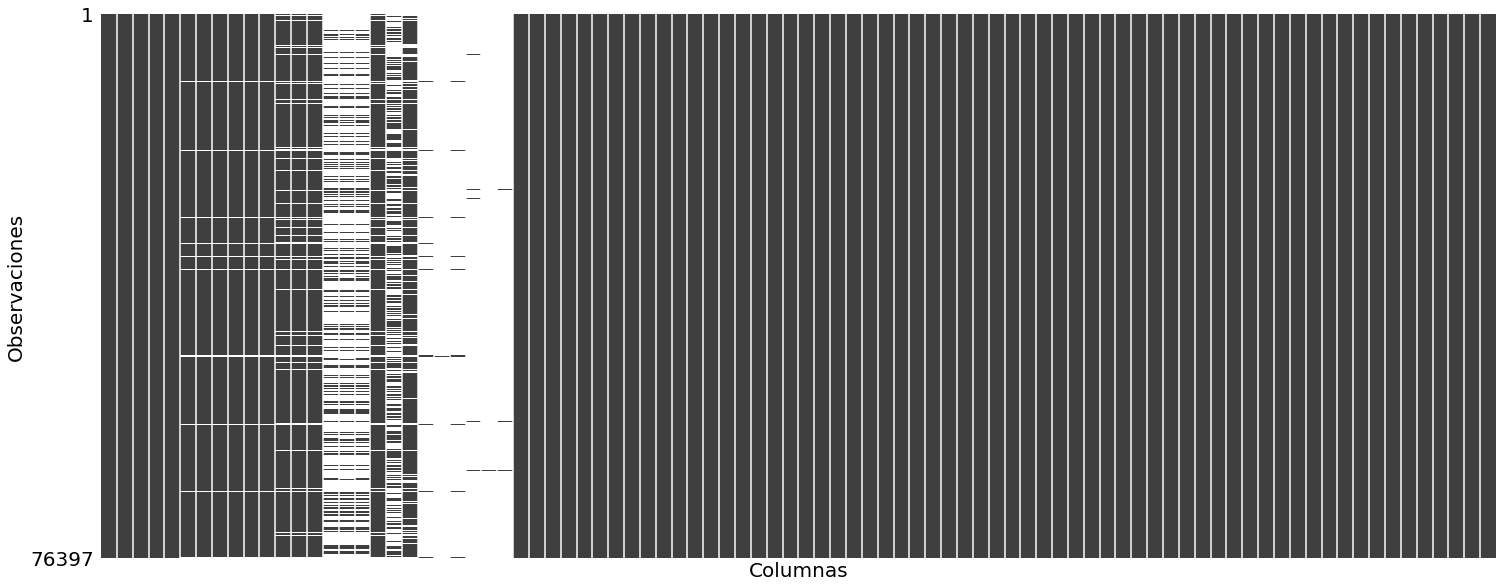

In [11]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

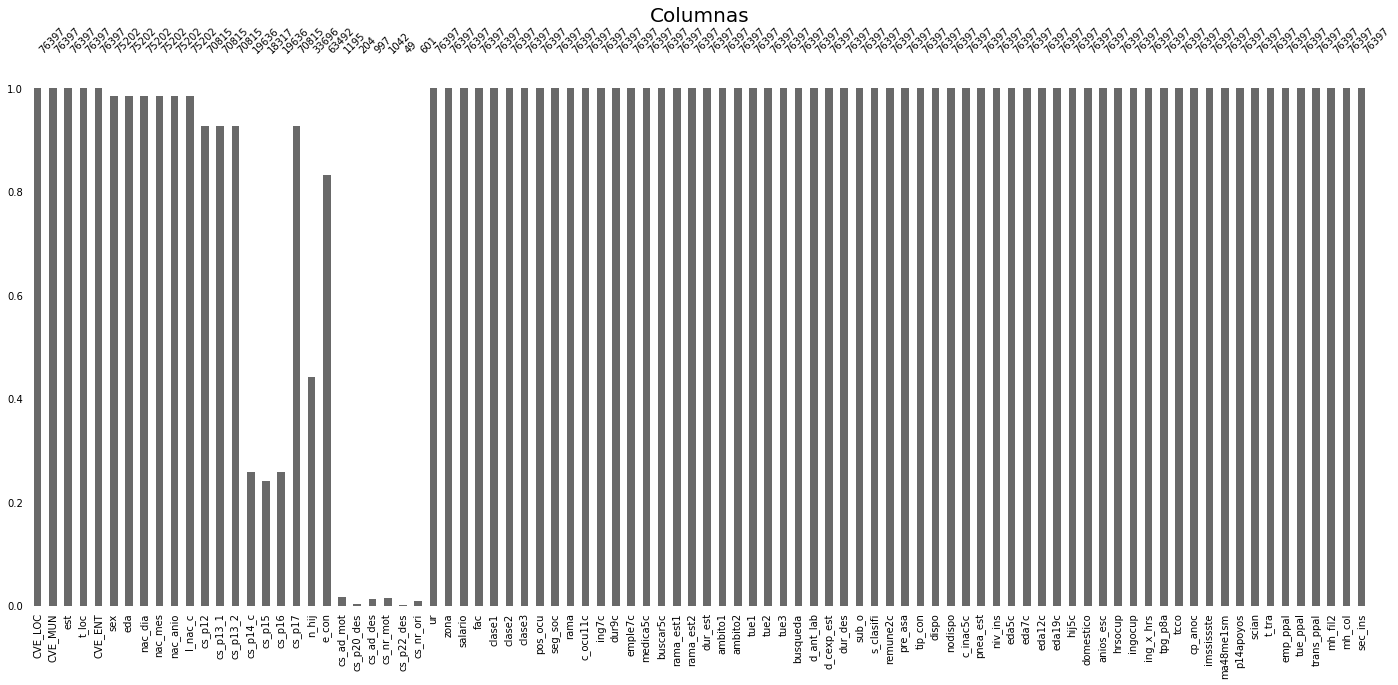

In [12]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [13]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [14]:
df_09.columns[df_09.isnull().any()].tolist()

[]

In [15]:
threshold = round(df_09.shape[0]*.8)
threshold

61118

In [16]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold, 'd e l e t e d')
            l.append(column)

cs_p14_c :  19636  -  61118 d e l e t e d
cs_p15 :  18317  -  61118 d e l e t e d
cs_p16 :  19636  -  61118 d e l e t e d
n_hij :  33696  -  61118 d e l e t e d
cs_ad_mot :  1195  -  61118 d e l e t e d
cs_p20_des :  204  -  61118 d e l e t e d
cs_ad_des :  997  -  61118 d e l e t e d
cs_nr_mot :  1042  -  61118 d e l e t e d
cs_p22_des :  49  -  61118 d e l e t e d
cs_nr_ori :  601  -  61118 d e l e t e d


In [17]:
df_09.shape

(76397, 88)

In [18]:
df_09.drop(labels=l, axis=1, inplace=True)

In [19]:
df_09.fillna(value=-1, inplace=True)

In [20]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

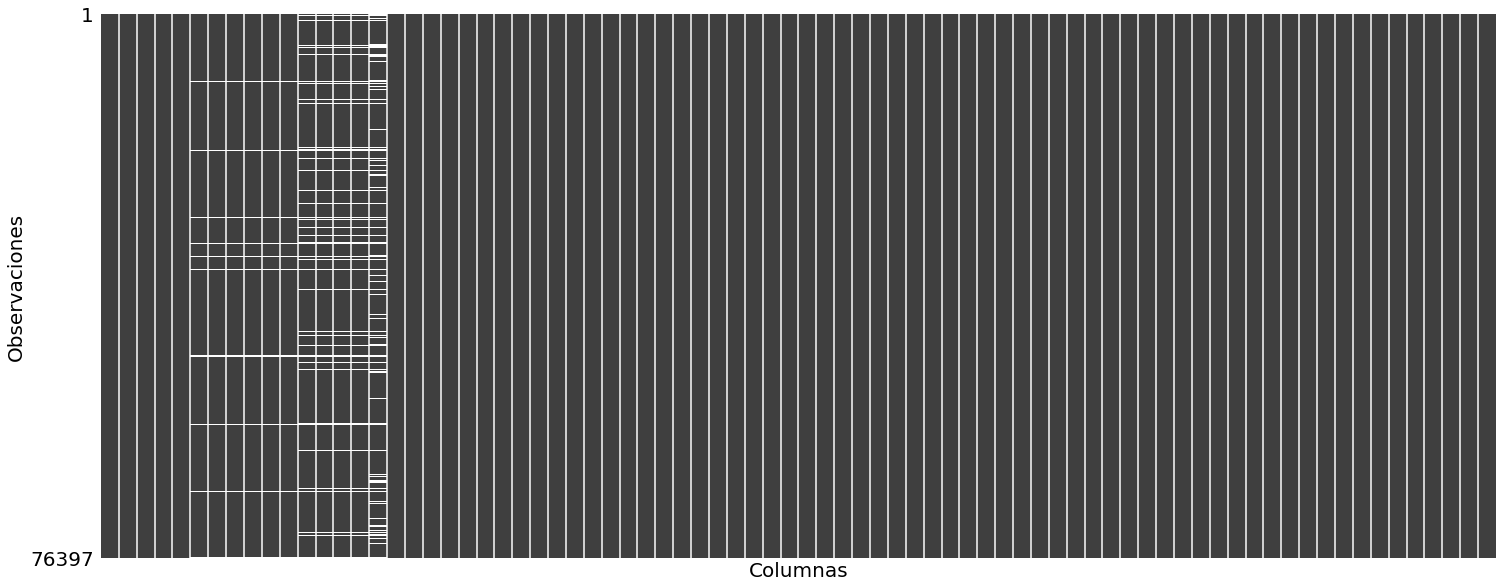

In [21]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

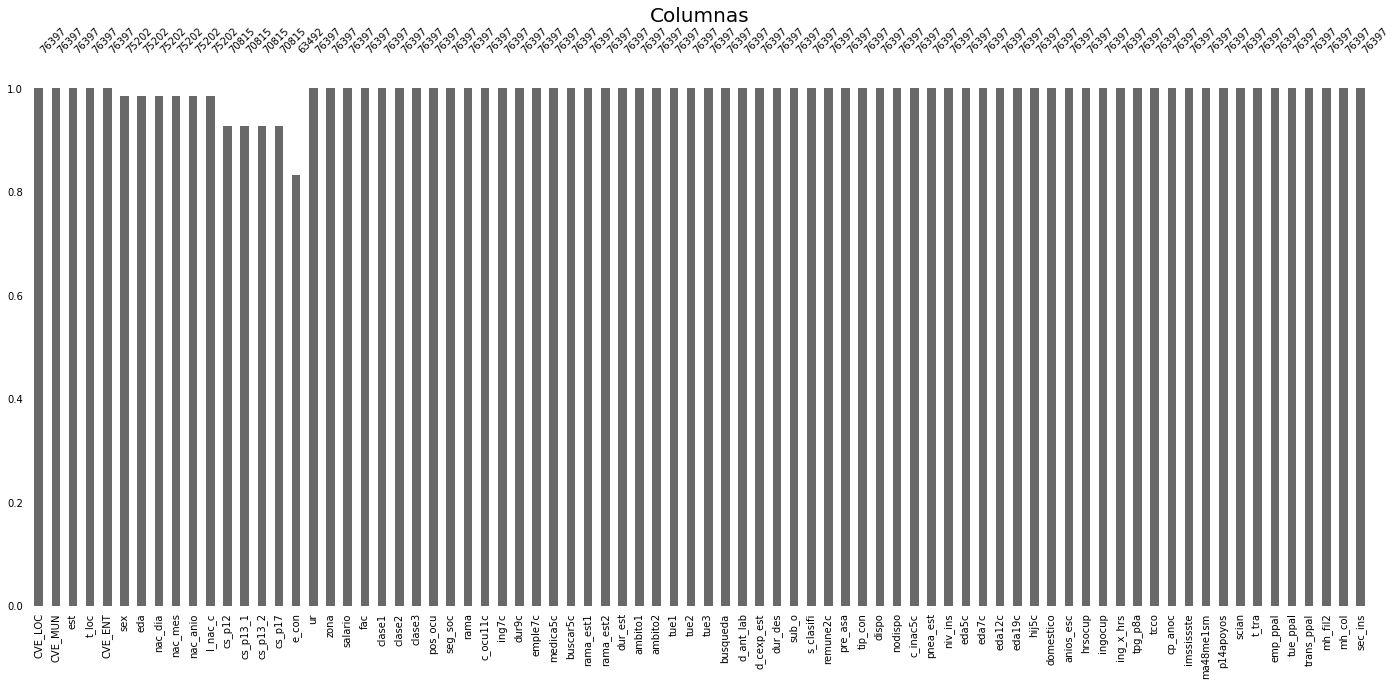

In [22]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [23]:
file = "../../../../../dataframes/enoe/SDEMT/df_09.csv"


In [24]:
df_09.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')